In [1]:
# Libraries imports
import math
from math import sin
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.problems.functional import FunctionalProblem
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.optimize import minimize
from pymoo.termination import get_termination
#from scipy.optimize import minimize
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
# Necessary to keep figure inside the notebook
%matplotlib inline

In [2]:
x1, y1 = 4, 4  # raw materials shop
x2, y2 = 2, 2  # cutting ws
x3, y3 = 2, 2  # welding ws
x4, y4 = 2, 3  # painting ws
x5, y5 = 2, 3  # tools stock
x6, y6 = 3, 3  # end product stock

#points = [(x1, y1), (x2, y2), (x3, y3), (x4, y4), (x5, y5), (x6, y6)]
points = [x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6]

In [3]:
d1 = [0, 1.5]  # reception door coordinate
d2 = [0, 6.5]  # shipment door coordinate

In [4]:
def F1(points, d1=[0, 1.5], d2=[0, 6.5]):
    points = list(points)
    # points = [d1] + points + [d2]
    points = [d1] + [points[i:i+2] for i in range(0, len(points), 2)] + [d2]
    return sum([math.dist(points[i], points[i+1]) for i in range(len(points)-1)])

F1(points, d1, d2)

14.155189919420936

In [5]:
def F2(points):
    points = list(points)
    points = [points[i:i+2] for i in range(0, len(points), 2)]
    return cdist(points, points).sum()/2.0

F2(points)

20.371630891611243

In [6]:
xl = [x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6]
xu = [20-x1, 12-y1, 20-x2, 12-y2, 20-x3, 12-y3, 20-x4, 12-y4, 20-x5, 12-y5, 20-x6, 12-y6]

#xl = [(x1, y1), (x2, y2), (x3, y3), (x4, y4), (x5, y5), (x6, y6)]
#xu = [(20-x1, 12-y1), (20-x2, 12-y2), (20-x3, 12-y3), (20-x4, 12-y4), (20-x5, 12-y5), (20-x6, 12-y6)]

In [7]:
class Workshop(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=12,
                         n_obj=2,
                         n_ieq_constr=0,
                         xl=np.array(xl),
                         xu=np.array(xu))
    
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = F1(x)
        f2 = F2(x)
        
        out["F"] = [f1, f2]
        out["G"] = []
        
problem = Workshop()

algorithm = NSGA2(
    pop_size=100,
    n_offsprings=50,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

termination = get_termination("n_gen",100)

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

X = res.X
F = res.F

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      2 |             - |             -
     2 |      150 |      3 |  0.5452031167 |         ideal
     3 |      200 |      1 |  5.7968650683 |         ideal
     4 |      250 |      1 |  9.3407764145 |         ideal
     5 |      300 |      1 |  0.000000E+00 |             f
     6 |      350 |      1 |  0.000000E+00 |             f
     7 |      400 |      1 |  0.000000E+00 |             f
     8 |      450 |      1 |  6.9264828172 |         ideal
     9 |      500 |      4 |  0.5614806300 |         ideal
    10 |      550 |      4 |  0.2234909287 |         ideal
    11 |      600 |      6 |  0.2384918934 |         ideal
    12 |      650 |      7 |  0.0901321519 |         ideal
    13 |      700 |      7 |  0.0783288823 |         ideal
    14 |      750 |      8 |  0.0827174834 |         ideal
    15 |      800 |      3 |  0.7640552900 |         ideal
    16 |      850 |      3 |  0.0050974626 |            

In [8]:
print(res.X)

[[4.05403149 4.00737109 4.06169951 3.9969661  4.25855898 4.0334398
  4.22054824 4.04265137 4.209974   4.08392991 4.07201537 4.41002977]
 [4.05148116 4.00750712 4.05209818 3.99740946 4.25811222 4.03343763
  4.22440471 4.04264526 4.209974   4.08383183 3.59378363 4.40889923]
 [4.05529074 4.00622693 4.05970318 3.99505665 4.25835595 3.94550833
  4.24459021 4.04278715 4.15626282 4.12762133 3.97576232 4.11225128]
 [4.05148116 4.00732852 4.19677001 3.99745354 4.25726249 4.03343763
  4.27667498 4.04264526 4.209974   4.08383183 3.98280446 4.4055008 ]
 [4.05157776 4.00732852 4.06683756 3.99745354 4.25674467 4.03343763
  4.27667498 4.04214902 4.209974   4.08383183 3.97269533 4.40642181]
 [4.05403149 4.01949847 4.06169951 4.05743717 4.25855898 4.0334398
  4.23806389 4.04265137 4.209974   4.08363417 4.07201537 4.41002977]
 [4.05529074 4.00622693 3.99973134 3.99490509 4.25835595 4.02849213
  4.23602966 4.04277362 4.15626282 4.12692251 3.97576232 4.12597422]
 [4.05529074 4.00622693 4.05970318 3.995056

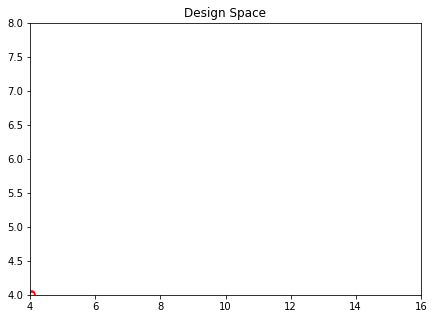

In [9]:
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.title("Design Space")
plt.show()

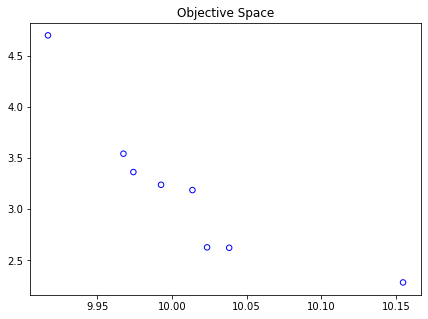

In [10]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()